### step 2

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [3]:
seed = 7
np.random.seed(seed)

In [4]:
dataframe = pd.read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

X = dataset[:,0:60].astype(float)

Y = dataset[:,60]
Y=le.fit_transform(dataset[:,60])



from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)

one_hot_train_labels=to_categorical(y_train)
one_hot_test_labels=to_categorical(y_test)

x_val=x_train[:25]
partial_x_train=x_train[25:]

y_val=one_hot_train_labels[:25]
partial_y_train=one_hot_train_labels[25:]

In [13]:
def create_baseline():
    model=Sequential()
    model.add(Dense(32,activation='relu',input_shape=(60,)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model

In [5]:
estimator=KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=seed)
results=cross_val_score(estimator,X,Y,cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Results: 80.71% (5.02%)


## step 3 

In [8]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 85.11% (8.16%)


### step 4.1

In [14]:
def create_smaller():
    model=Sequential()
    model.add(Dense(30,activation='relu',input_shape=(60,)))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Smaller: 84.59% (2.99%)


### step 4.2 

In [4]:
def create_larger():
    model=Sequential()
    model.add(Dense(30,activation='relu',input_shape=(60,)))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
186/186 [==============================] - 1s 3ms/step - loss: 0.6937 - acc: 0.5376
Epoch 2/100
186/186 [==============================] - 0s 860us/step - loss: 0.5480 - acc: 0.7097
Epoch 3/100
186/186 [==============================] - 0s 753us/step - loss: 0.4553 - acc: 0.8172
Epoch 4/100
186/186 [==============================] - 0s 774us/step - loss: 0.3671 - acc: 0.8548
Epoch 5/100
186/186 [==============================] - 0s 559us/step - loss: 0.2943 - acc: 0.8978
Epoch 6/100
186/186 [==============================] - 0s 473us/step - loss: 0.2296 - acc: 0.9301
Epoch 7/100
186/186 [==============================] - 0s 473us/step - loss: 0.1866 - acc: 0.9462
Epoch 8/100
186/186 [==============================] - 0s 494us/step - loss: 0.1453 - acc: 0.9785
Epoch 9/100
186/186 [==============================] - 0s 494us/step - loss: 0.1150 - acc: 0.9839
Epoch 10/100
186/186

187/187 [==============================] - 0s 235us/step - loss: 9.5346e-04 - acc: 1.0000
Epoch 49/100
187/187 [==============================] - 0s 214us/step - loss: 8.9765e-04 - acc: 1.0000
Epoch 50/100
187/187 [==============================] - 0s 214us/step - loss: 8.4448e-04 - acc: 1.0000
Epoch 51/100
187/187 [==============================] - 0s 214us/step - loss: 8.0469e-04 - acc: 1.0000
Epoch 52/100
187/187 [==============================] - 0s 214us/step - loss: 7.6125e-04 - acc: 1.0000
Epoch 53/100
187/187 [==============================] - 0s 235us/step - loss: 7.1886e-04 - acc: 1.0000
Epoch 54/100
187/187 [==============================] - 0s 214us/step - loss: 6.8304e-04 - acc: 1.0000
Epoch 55/100
187/187 [==============================] - 0s 214us/step - loss: 6.4722e-04 - acc: 1.0000
Epoch 56/100
187/187 [==============================] - 0s 235us/step - loss: 6.0897e-04 - acc: 1.0000
Epoch 57/100
187/187 [==============================] - 0s 235us/step - loss: 5.7457e-

187/187 [==============================] - 0s 235us/step - loss: 0.1293 - acc: 0.9733
Epoch 9/100
187/187 [==============================] - 0s 235us/step - loss: 0.1025 - acc: 0.9893
Epoch 10/100
187/187 [==============================] - 0s 235us/step - loss: 0.0809 - acc: 0.9893
Epoch 11/100
187/187 [==============================] - 0s 235us/step - loss: 0.0641 - acc: 0.9947
Epoch 12/100
187/187 [==============================] - 0s 214us/step - loss: 0.0541 - acc: 0.9947
Epoch 13/100
187/187 [==============================] - 0s 246us/step - loss: 0.0437 - acc: 1.0000
Epoch 14/100
187/187 [==============================] - 0s 245us/step - loss: 0.0353 - acc: 1.0000
Epoch 15/100
187/187 [==============================] - 0s 257us/step - loss: 0.0269 - acc: 1.0000
Epoch 16/100
187/187 [==============================] - 0s 235us/step - loss: 0.0218 - acc: 1.0000
Epoch 17/100
187/187 [==============================] - 0s 235us/step - loss: 0.0180 - acc: 1.0000
Epoch 18/100
187/187 [==

187/187 [==============================] - 0s 235us/step - loss: 3.3024e-04 - acc: 1.0000
Epoch 71/100
187/187 [==============================] - 0s 214us/step - loss: 3.1630e-04 - acc: 1.0000
Epoch 72/100
187/187 [==============================] - 0s 235us/step - loss: 3.0321e-04 - acc: 1.0000
Epoch 73/100
187/187 [==============================] - 0s 235us/step - loss: 2.9189e-04 - acc: 1.0000
Epoch 74/100
187/187 [==============================] - 0s 235us/step - loss: 2.7998e-04 - acc: 1.0000
Epoch 75/100
187/187 [==============================] - 0s 235us/step - loss: 2.6865e-04 - acc: 1.0000
Epoch 76/100
187/187 [==============================] - 0s 235us/step - loss: 2.5807e-04 - acc: 1.0000
Epoch 77/100
187/187 [==============================] - 0s 214us/step - loss: 2.4908e-04 - acc: 1.0000
Epoch 78/100
187/187 [==============================] - 0s 235us/step - loss: 2.3915e-04 - acc: 1.0000
Epoch 79/100
187/187 [==============================] - 0s 235us/step - loss: 2.3001e-

187/187 [==============================] - 0s 257us/step - loss: 0.0026 - acc: 1.0000
Epoch 32/100
187/187 [==============================] - 0s 235us/step - loss: 0.0024 - acc: 1.0000
Epoch 33/100
187/187 [==============================] - 0s 257us/step - loss: 0.0022 - acc: 1.0000
Epoch 34/100
187/187 [==============================] - 0s 257us/step - loss: 0.0020 - acc: 1.0000
Epoch 35/100
187/187 [==============================] - 0s 235us/step - loss: 0.0018 - acc: 1.0000
Epoch 36/100
187/187 [==============================] - 0s 235us/step - loss: 0.0017 - acc: 1.0000
Epoch 37/100
187/187 [==============================] - 0s 218us/step - loss: 0.0016 - acc: 1.0000
Epoch 38/100
187/187 [==============================] - 0s 235us/step - loss: 0.0015 - acc: 1.0000
Epoch 39/100
187/187 [==============================] - 0s 235us/step - loss: 0.0014 - acc: 1.0000
Epoch 40/100
187/187 [==============================] - 0s 235us/step - loss: 0.0013 - acc: 1.0000
Epoch 41/100
187/187 [=

188/188 [==============================] - 0s 255us/step - loss: 1.2810e-04 - acc: 1.0000
Epoch 93/100
188/188 [==============================] - 0s 255us/step - loss: 1.2449e-04 - acc: 1.0000
Epoch 94/100
188/188 [==============================] - 0s 255us/step - loss: 1.2025e-04 - acc: 1.0000
Epoch 95/100
188/188 [==============================] - 0s 255us/step - loss: 1.1636e-04 - acc: 1.0000
Epoch 96/100
188/188 [==============================] - 0s 255us/step - loss: 1.1243e-04 - acc: 1.0000
Epoch 97/100
188/188 [==============================] - 0s 255us/step - loss: 1.0851e-04 - acc: 1.0000
Epoch 98/100
188/188 [==============================] - 0s 255us/step - loss: 1.0542e-04 - acc: 1.0000
Epoch 99/100
188/188 [==============================] - 0s 255us/step - loss: 1.0189e-04 - acc: 1.0000
Epoch 100/100
20/20 [==============================] - 0s 9ms/step
Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.7309 - acc: 0.5426
Epoch 2/100
188/188 [=====

188/188 [==============================] - 0s 234us/step - loss: 3.2161e-04 - acc: 1.0000
Epoch 74/100
188/188 [==============================] - 0s 234us/step - loss: 3.0764e-04 - acc: 1.0000
Epoch 75/100
188/188 [==============================] - 0s 234us/step - loss: 2.9531e-04 - acc: 1.0000
Epoch 76/100
188/188 [==============================] - 0s 255us/step - loss: 2.8438e-04 - acc: 1.0000
Epoch 77/100
188/188 [==============================] - 0s 234us/step - loss: 2.7255e-04 - acc: 1.0000
Epoch 78/100
188/188 [==============================] - 0s 234us/step - loss: 2.6321e-04 - acc: 1.0000
Epoch 79/100
188/188 [==============================] - 0s 255us/step - loss: 2.5219e-04 - acc: 1.0000
Epoch 80/100
188/188 [==============================] - 0s 255us/step - loss: 2.4251e-04 - acc: 1.0000
Epoch 81/100
188/188 [==============================] - 0s 234us/step - loss: 2.3455e-04 - acc: 1.0000
Epoch 82/100
188/188 [==============================] - 0s 234us/step - loss: 2.2585e-

Epoch 54/100
188/188 [==============================] - 0s 255us/step - loss: 5.7764e-04 - acc: 1.0000
Epoch 55/100
188/188 [==============================] - 0s 255us/step - loss: 5.4342e-04 - acc: 1.0000
Epoch 56/100
188/188 [==============================] - 0s 234us/step - loss: 5.1851e-04 - acc: 1.0000
Epoch 57/100
188/188 [==============================] - 0s 255us/step - loss: 4.9421e-04 - acc: 1.0000
Epoch 58/100
188/188 [==============================] - 0s 255us/step - loss: 4.7152e-04 - acc: 1.0000
Epoch 59/100
188/188 [==============================] - 0s 255us/step - loss: 4.4933e-04 - acc: 1.0000
Epoch 60/100
188/188 [==============================] - 0s 238us/step - loss: 4.3177e-04 - acc: 1.0000
Epoch 61/100
188/188 [==============================] - 0s 255us/step - loss: 4.1248e-04 - acc: 1.0000
Epoch 62/100
188/188 [==============================] - 0s 234us/step - loss: 3.9472e-04 - acc: 1.0000
Epoch 63/100
188/188 [==============================] - 0s 255us/step - l

### 5

In [5]:
def create_overfit():
    model=Sequential()
    model.add(Dense(30,activation='relu',input_shape=(60,)))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(60,activation='relu'))
    model.add(Dense(60,activation='relu'))    
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_overfit, epochs=150, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Overfit: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/150
186/186 [==============================] - 1s 4ms/step - loss: 0.6639 - acc: 0.5860
Epoch 2/150
186/186 [==============================] - 0s 297us/step - loss: 0.4935 - acc: 0.7581
Epoch 3/150
186/186 [==============================] - 0s 279us/step - loss: 0.3845 - acc: 0.8118
Epoch 4/150
186/186 [==============================] - 0s 280us/step - loss: 0.2831 - acc: 0.8763
Epoch 5/150
186/186 [==============================] - 0s 258us/step - loss: 0.1986 - acc: 0.9247
Epoch 6/150
186/186 [==============================] - 0s 258us/step - loss: 0.1342 - acc: 0.9624
Epoch 7/150
186/186 [==============================] - 0s 258us/step - loss: 0.0959 - acc: 0.9731
Epoch 8/150
186/186 [==============================] - 0s 280us/step - loss: 0.0596 - acc: 0.9839
Epoch 9/150
186/186 [==============================] - 0s 258us/step - loss: 0.0279 - acc: 0.9892
Epoch 10/150
186/186 [==============================] - 0s 279us/step - loss: 0.0174 - acc: 0.9946
Epoch 11/150
186/186 

186/186 [==============================] - 0s 258us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 82/150
186/186 [==============================] - 0s 258us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 83/150
186/186 [==============================] - 0s 258us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 84/150
186/186 [==============================] - 0s 263us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 85/150
186/186 [==============================] - 0s 258us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 86/150
186/186 [==============================] - 0s 258us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 87/150
186/186 [==============================] - 0s 268us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 88/150
186/186 [==============================] - 0s 258us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 89/150
186/186 [==============================] - 0s 279us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 90/150
186/186 [==============================] - 0s 258us/step - loss: 1.0899e-

187/187 [==============================] - 0s 278us/step - loss: 0.0117 - acc: 1.0000
Epoch 11/150
187/187 [==============================] - 0s 278us/step - loss: 0.0049 - acc: 1.0000
Epoch 12/150
187/187 [==============================] - 0s 276us/step - loss: 0.0013 - acc: 1.0000
Epoch 13/150
187/187 [==============================] - 0s 278us/step - loss: 4.5760e-04 - acc: 1.0000
Epoch 14/150
187/187 [==============================] - 0s 271us/step - loss: 1.4216e-04 - acc: 1.0000
Epoch 15/150
187/187 [==============================] - 0s 278us/step - loss: 3.4748e-05 - acc: 1.0000
Epoch 16/150
187/187 [==============================] - 0s 299us/step - loss: 3.1912e-05 - acc: 1.0000
Epoch 17/150
187/187 [==============================] - 0s 264us/step - loss: 2.4216e-06 - acc: 1.0000
Epoch 18/150
187/187 [==============================] - 0s 257us/step - loss: 9.8629e-07 - acc: 1.0000
Epoch 19/150
187/187 [==============================] - 0s 278us/step - loss: 1.8860e-06 - acc: 1.

187/187 [==============================] - 0s 278us/step - loss: 1.6260e-07 - acc: 1.0000
Epoch 19/150
187/187 [==============================] - 0s 278us/step - loss: 1.1336e-07 - acc: 1.0000
Epoch 20/150
187/187 [==============================] - 0s 278us/step - loss: 1.0971e-07 - acc: 1.0000
Epoch 21/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 22/150
187/187 [==============================] - 0s 278us/step - loss: 1.0919e-07 - acc: 1.0000
Epoch 23/150
187/187 [==============================] - 0s 283us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 24/150
187/187 [==============================] - 0s 257us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 25/150
187/187 [==============================] - 0s 257us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 26/150
187/187 [==============================] - 0s 253us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 27/150
187/187 [==============================] - 0s 257us/step - loss: 1.0894e-

187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 27/150
187/187 [==============================] - 0s 321us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 28/150
187/187 [==============================] - 0s 364us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 29/150
187/187 [==============================] - 0s 321us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 30/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 31/150
187/187 [==============================] - 0s 286us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 32/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 33/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 34/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 35/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-

187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 35/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 36/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 37/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 38/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 39/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 40/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 41/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 42/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 43/150
187/187 [==============================] - 0s 257us/step - loss: 1.0894e-

187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 43/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 44/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 45/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 46/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 47/150
187/187 [==============================] - 0s 280us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 48/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 49/150
187/187 [==============================] - 0s 290us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 50/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 51/150
187/187 [==============================] - 0s 299us/step - loss: 1.0894e-

187/187 [==============================] - 0s 299us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 51/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 52/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 53/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 54/150
187/187 [==============================] - 0s 286us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 55/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 56/150
187/187 [==============================] - 0s 257us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 57/150
187/187 [==============================] - 0s 257us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 58/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-07 - acc: 1.0000
Epoch 59/150
187/187 [==============================] - 0s 278us/step - loss: 1.0894e-

188/188 [==============================] - 0s 277us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 59/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 60/150
188/188 [==============================] - 0s 277us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 61/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 62/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 63/150
188/188 [==============================] - 0s 277us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 64/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 65/150
188/188 [==============================] - 0s 282us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 66/150
188/188 [==============================] - 0s 277us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 67/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-

188/188 [==============================] - 0s 322us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 67/150
188/188 [==============================] - 0s 319us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 68/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 69/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 70/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 71/150
188/188 [==============================] - 0s 319us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 72/150
188/188 [==============================] - 0s 319us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 73/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 74/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 75/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-

188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 75/150
188/188 [==============================] - 0s 319us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 76/150
188/188 [==============================] - 0s 340us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 77/150
188/188 [==============================] - 0s 302us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 78/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 79/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 80/150
188/188 [==============================] - 0s 302us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 81/150
188/188 [==============================] - 0s 307us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 82/150
188/188 [==============================] - 0s 298us/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 83/150
188/188 [==============================] - 0s 319us/step - loss: 1.0899e-

### STEP 6

In [9]:
def create_optimized():
    model=Sequential()
    model.add(Dense(32,activation='relu',input_shape=(60,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    #model.fit(partial_x_train,partial_y_train,epochs=5,validation_data=(x_val,y_val))
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_optimized, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("optimized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
186/186 [==============================] - 0s 2ms/step - loss: 0.6418 - acc: 0.5968
Epoch 2/100
186/186 [==============================] - 0s 430us/step - loss: 0.5189 - acc: 0.7957
Epoch 3/100
186/186 [==============================] - 0s 430us/step - loss: 0.4290 - acc: 0.8656
Epoch 4/100
186/186 [==============================] - 0s 452us/step - loss: 0.3571 - acc: 0.8925
Epoch 5/100
186/186 [==============================] - 0s 430us/step - loss: 0.3002 - acc: 0.9086
Epoch 6/100
186/186 [==============================] - 0s 430us/step - loss: 0.2563 - acc: 0.9247
Epoch 7/100
186/186 [==============================] - 0s 452us/step - loss: 0.2178 - acc: 0.9247
Epoch 8/100
186/186 [==============================] - 0s 430us/step - loss: 0.1879 - acc: 0.9355
Epoch 9/100
186/186 [==============================] - 0s 408us/step - loss: 0.1584 - acc: 0.9570
Epoch 10/100
186/186

KeyboardInterrupt: 

### step 7

In [31]:
import keras
inputs= keras.Input(shape=(60,))
x=Dense(32,activation='relu')(inputs)
x=Dense(32,activation='relu')(x)
outputs=Dense(2,activation='sigmoid')(x) 
model=keras.Model(inputs,outputs)
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])    
model.fit(partial_x_train,partial_y_train,epochs=100,validation_data=(x_val,y_val))


Train on 114 samples, validate on 25 samples
Epoch 1/100
114/114 [==============================] - 6s 56ms/step - loss: 0.6929 - acc: 0.4781 - val_loss: 0.6735 - val_acc: 0.5800
Epoch 2/100
114/114 [==============================] - 0s 219us/step - loss: 0.6857 - acc: 0.5219 - val_loss: 0.6722 - val_acc: 0.6000
Epoch 3/100
114/114 [==============================] - 0s 202us/step - loss: 0.6821 - acc: 0.5307 - val_loss: 0.6698 - val_acc: 0.6000
Epoch 4/100
114/114 [==============================] - 0s 175us/step - loss: 0.6791 - acc: 0.5395 - val_loss: 0.6644 - val_acc: 0.6000
Epoch 5/100
114/114 [==============================] - 0s 149us/step - loss: 0.6773 - acc: 0.5351 - val_loss: 0.6594 - val_acc: 0.6000
Epoch 6/100
114/114 [==============================] - 0s 158us/step - loss: 0.6752 - acc: 0.5307 - val_loss: 0.6537 - val_acc: 0.6600
Epoch 7/100
114/114 [==============================] - 0s 140us/step - loss: 0.6684 - acc: 0.5746 - val_loss: 0.6439 - val_acc: 0.6400
Epoch 8/100

Epoch 61/100
114/114 [==============================] - 0s 140us/step - loss: 0.4385 - acc: 0.8333 - val_loss: 0.3804 - val_acc: 0.9400
Epoch 62/100
114/114 [==============================] - 0s 152us/step - loss: 0.4388 - acc: 0.8246 - val_loss: 0.3791 - val_acc: 0.9200
Epoch 63/100
114/114 [==============================] - 0s 140us/step - loss: 0.4271 - acc: 0.8421 - val_loss: 0.3801 - val_acc: 0.9200
Epoch 64/100
114/114 [==============================] - 0s 131us/step - loss: 0.4229 - acc: 0.8553 - val_loss: 0.3742 - val_acc: 0.9200
Epoch 65/100
114/114 [==============================] - 0s 140us/step - loss: 0.4192 - acc: 0.8640 - val_loss: 0.4246 - val_acc: 0.8200
Epoch 66/100
114/114 [==============================] - 0s 123us/step - loss: 0.4206 - acc: 0.8377 - val_loss: 0.3856 - val_acc: 0.9000
Epoch 67/100
114/114 [==============================] - 0s 123us/step - loss: 0.4148 - acc: 0.8421 - val_loss: 0.3774 - val_acc: 0.9200
Epoch 68/100
114/114 [==========================

### step 8

Train on 114 samples, validate on 25 samples
Epoch 1/100
114/114 [==============================] - 7s 59ms/step - loss: 0.7040 - acc: 0.4693 - val_loss: 0.6752 - val_acc: 0.5600
Epoch 2/100
114/114 [==============================] - 0s 187us/step - loss: 0.6876 - acc: 0.5702 - val_loss: 0.6630 - val_acc: 0.6200
Epoch 3/100
114/114 [==============================] - 0s 193us/step - loss: 0.6741 - acc: 0.5702 - val_loss: 0.6540 - val_acc: 0.7200
Epoch 4/100
114/114 [==============================] - 0s 158us/step - loss: 0.6659 - acc: 0.6184 - val_loss: 0.6378 - val_acc: 0.7400
Epoch 5/100
114/114 [==============================] - 0s 184us/step - loss: 0.6573 - acc: 0.6404 - val_loss: 0.6335 - val_acc: 0.8000
Epoch 6/100
114/114 [==============================] - 0s 175us/step - loss: 0.6485 - acc: 0.6579 - val_loss: 0.6217 - val_acc: 0.8000
Epoch 7/100
114/114 [==============================] - 0s 175us/step - loss: 0.6399 - acc: 0.6754 - val_loss: 0.6114 - val_acc: 0.7600
Epoch 8/100

Epoch 61/100
114/114 [==============================] - 0s 184us/step - loss: 0.3233 - acc: 0.8684 - val_loss: 0.2509 - val_acc: 0.9200
Epoch 62/100
114/114 [==============================] - 0s 167us/step - loss: 0.3232 - acc: 0.8553 - val_loss: 0.2981 - val_acc: 0.9000
Epoch 63/100
114/114 [==============================] - 0s 175us/step - loss: 0.3194 - acc: 0.8904 - val_loss: 0.2464 - val_acc: 0.9200
Epoch 64/100
114/114 [==============================] - 0s 184us/step - loss: 0.3073 - acc: 0.9035 - val_loss: 0.2393 - val_acc: 0.9200
Epoch 65/100
114/114 [==============================] - 0s 175us/step - loss: 0.3096 - acc: 0.8596 - val_loss: 0.3048 - val_acc: 0.8600
Epoch 66/100
114/114 [==============================] - 0s 210us/step - loss: 0.2986 - acc: 0.8596 - val_loss: 0.2431 - val_acc: 0.9000
Epoch 67/100
114/114 [==============================] - 0s 202us/step - loss: 0.3342 - acc: 0.8728 - val_loss: 0.2505 - val_acc: 0.9400
Epoch 68/100
114/114 [==========================

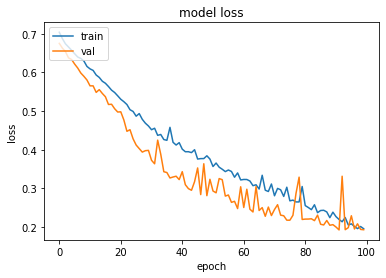

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel,self).__init__()
        self.dense1=Dense(64,activation='relu')
        self.dense2=Dense(64,activation='relu')
        self.dense3=Dense(2,activation='sigmoid')
        
    def call(self,inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        return self.dense3(x)
model=MyModel()
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])    
history=model.fit(partial_x_train,partial_y_train,epochs=100,validation_data=(x_val,y_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

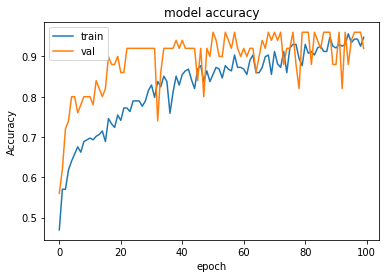

In [44]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### step 9

In [10]:
k=4
num_val_samples=len(X)//k
num_epochs=15
all_scores=[]

for i in range(k):
    print('processing fold #', i)
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = Y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X[:i * num_val_samples],
    X[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [Y[:i * num_val_samples],
    Y[(i + 1) * num_val_samples:]],
    axis=0)
    model = create_optimized()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/15
156/156 [==============================] - 1s 5ms/step - loss: 0.5803 - acc: 0.7115
Epoch 2/15
156/156 [==============================] - 1s 4ms/step - loss: 0.5295 - acc: 0.7115
Epoch 3/15
156/156 [==============================] - 1s 4ms/step - loss: 0.4834 - acc: 0.7436
Epoch 4/15
156/156 [==============================] - 1s 4ms/step - loss: 0.4503 - acc: 0.7821
Epoch 5/15
 15/156 [=>............................] - ETA: 0s - loss: 0.3411 - acc: 0.8667

KeyboardInterrupt: 

In [53]:
all_scores
np.mean(all_scores)

0.3365384593176154